<a href="https://colab.research.google.com/github/samarth2504/supportvectormachine/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

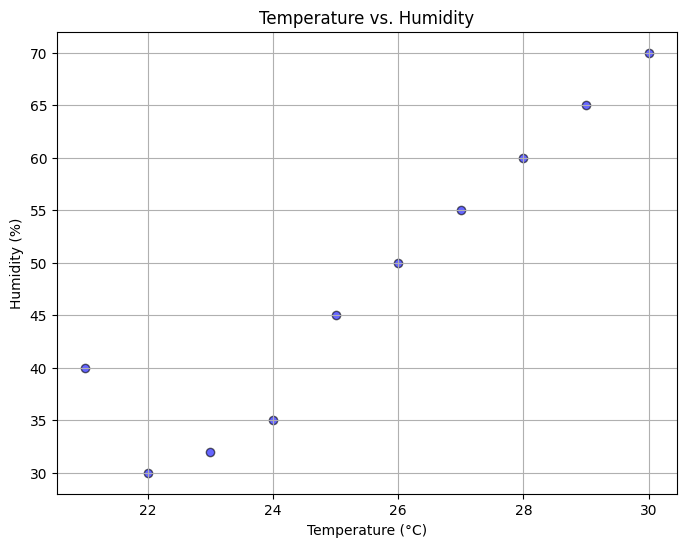

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Temperature': [22, 24, 21, 23, 25, 26, 27, 28, 29, 30],
    'Humidity': [30, 35, 40, 32, 45, 50, 55, 60, 65, 70]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Humidity'], color='b', alpha=0.6, edgecolor='k')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
#scatter plot temperature vs humidity

<ipython-input-2-02e4cb8223cc>:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', periods=sample_size, freq='H')
<ipython-input-2-02e4cb8223cc>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Date'].dt.strftime('%Y-%m-%d %H:%M'), y=df['Speed'], palette='viridis', ax=ax3)
<ipython-input-2-02e4cb8223cc>:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df['Date'].dt.strftime('%Y-%m-%d %H:%M'), rotation=45)
<ipython-input-2-02e4cb8223cc>:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(df['Date'].dt.strftime('%Y-%m-%d %H:%M'), rotatio

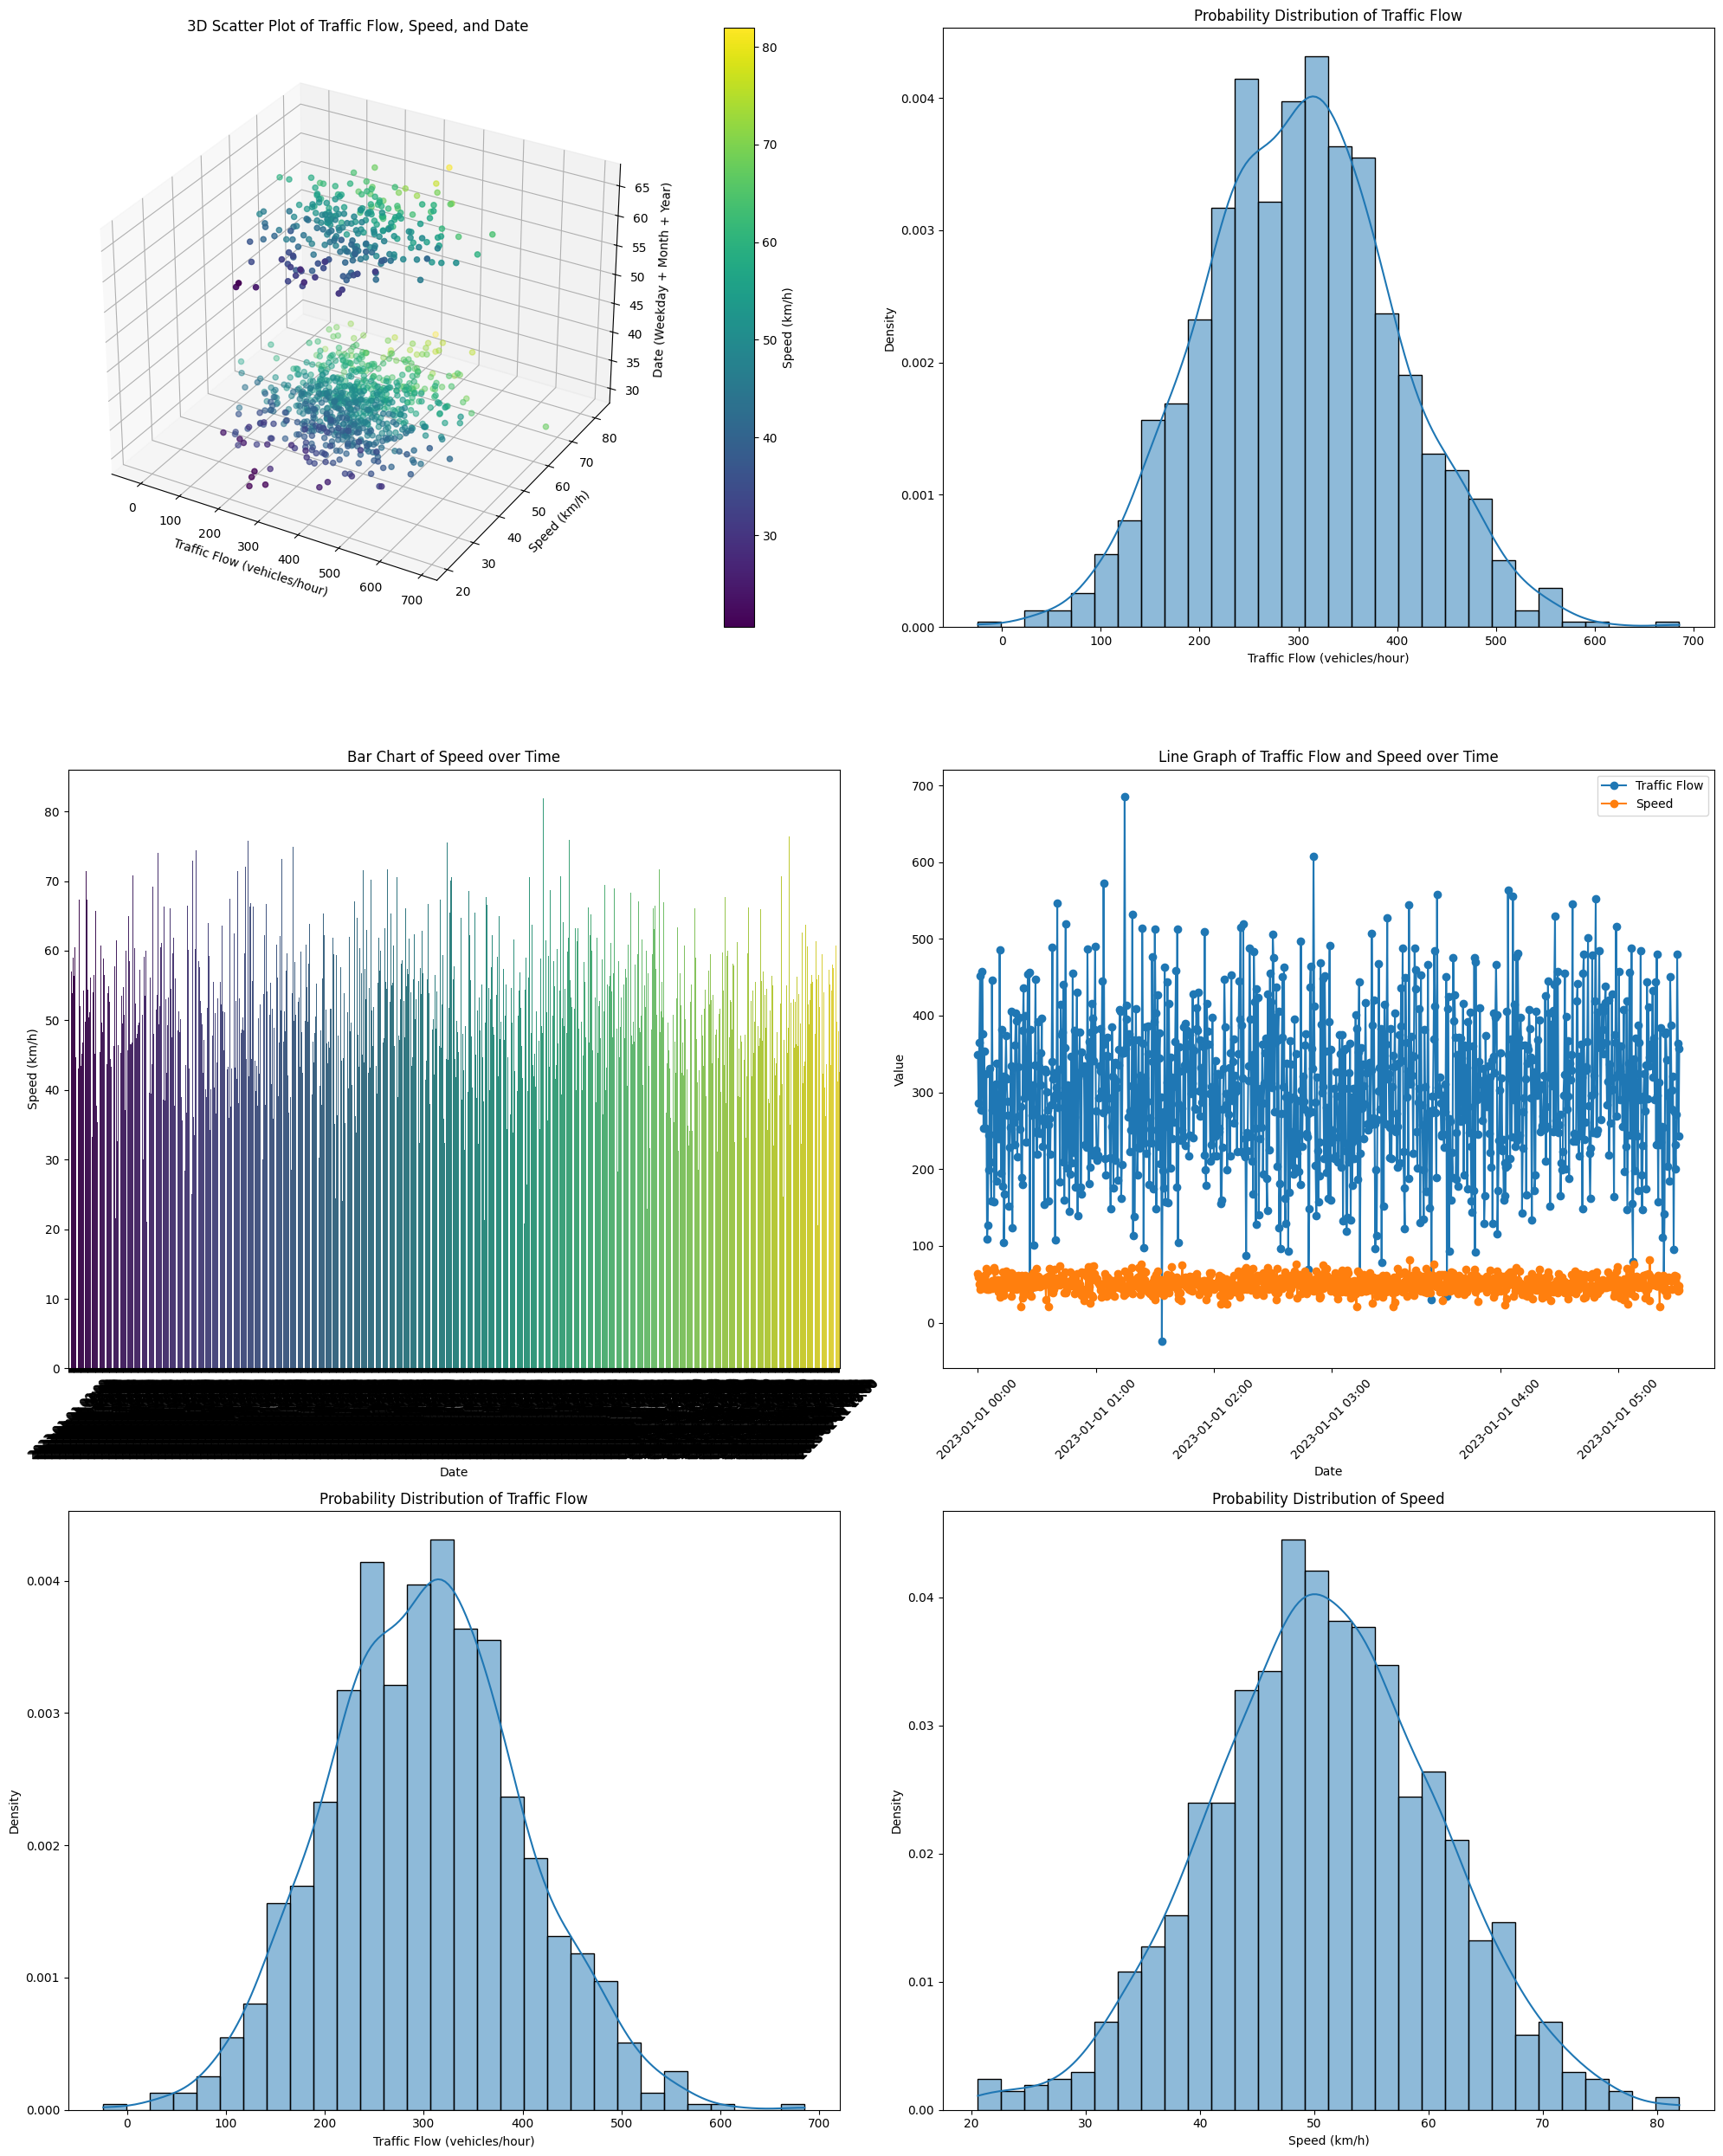

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
np.random.seed(42)
sample_size = 1000
traffic_flow = np.random.normal(loc=300, scale=100, size=sample_size)
speed = np.random.normal(loc=50, scale=10, size=sample_size)
dates = pd.date_range(start='2023-01-01', periods=sample_size, freq='H')

# Create a DataFrame
data = {
    'Date': dates,
    'Traffic_Flow': traffic_flow,
    'Speed': speed
}
df = pd.DataFrame(data)
df['Weekday'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Create subplots
fig = plt.figure(figsize=(20, 25))

# 3D scatter plot
ax1 = fig.add_subplot(321, projection='3d')
scatter = ax1.scatter(df['Traffic_Flow'], df['Speed'], df['Weekday'] + df['Month']*30 + (df['Year']-2023)*365, c=df['Speed'], cmap='viridis', marker='o')
ax1.set_title('3D Scatter Plot of Traffic Flow, Speed, and Date')
ax1.set_xlabel('Traffic Flow (vehicles/hour)')
ax1.set_ylabel('Speed (km/h)')
ax1.set_zlabel('Date (Weekday + Month + Year)')
cbar = fig.colorbar(scatter, ax=ax1, pad=0.1)
cbar.set_label('Speed (km/h)')

# Histogram of Traffic Flow
ax2 = fig.add_subplot(322)
sns.histplot(df['Traffic_Flow'], kde=True, stat="density", bins=30, ax=ax2)
ax2.set_title('Probability Distribution of Traffic Flow')
ax2.set_xlabel('Traffic Flow (vehicles/hour)')
ax2.set_ylabel('Density')

# Bar chart of Speed
ax3 = fig.add_subplot(323)
sns.barplot(x=df['Date'].dt.strftime('%Y-%m-%d %H:%M'), y=df['Speed'], palette='viridis', ax=ax3)
ax3.set_title('Bar Chart of Speed over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Speed (km/h)')
ax3.set_xticklabels(df['Date'].dt.strftime('%Y-%m-%d %H:%M'), rotation=45)

# Line graph of Traffic Flow and Speed over Time
ax4 = fig.add_subplot(324)
ax4.plot(df['Date'], df['Traffic_Flow'], marker='o', label='Traffic Flow')
ax4.plot(df['Date'], df['Speed'], marker='o', label='Speed')
ax4.set_title('Line Graph of Traffic Flow and Speed over Time')
ax4.set_xlabel('Date')
ax4.set_ylabel('Value')
ax4.legend()
ax4.set_xticklabels(df['Date'].dt.strftime('%Y-%m-%d %H:%M'), rotation=45)

# Probability distribution frequency for Traffic Flow
ax5 = fig.add_subplot(325)
sns.histplot(df['Traffic_Flow'], kde=True, stat="density", bins=30, ax=ax5)
ax5.set_title('Probability Distribution of Traffic Flow')
ax5.set_xlabel('Traffic Flow (vehicles/hour)')
ax5.set_ylabel('Density')

# Probability distribution frequency for Speed
ax6 = fig.add_subplot(326)
sns.histplot(df['Speed'], kde=True, stat="density", bins=30, ax=ax6)
ax6.set_title('Probability Distribution of Speed')
ax6.set_xlabel('Speed (km/h)')
ax6.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

   Temperature (°C)  Humidity (%)  Cloud Cover (%)  Sunlight (hours)  \
0                25            75               50                 8   
1                30            80               80                 6   
2                22            60               30                10   
3                18            55               10                12   
4                27            70               60                 7   
5                32            85               90                 5   
6                20            50               20                11   
7                15            45                0                13   
8                24            65               40                 9   
9                29            78               70                 6   

   Rain (mm)  
0          5  
1         10  
2          0  
3          0  
4          3  
5         15  
6          0  
7          0  
8          2  
9          8  
                            OLS Regression

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


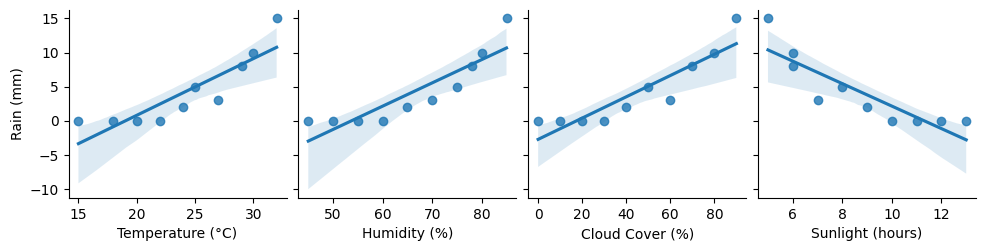

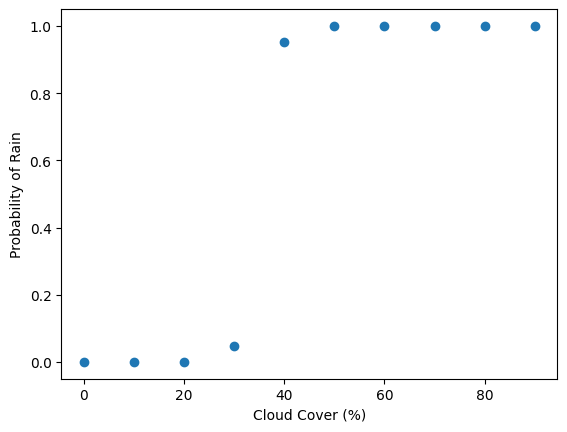

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Create a DataFrame with sample weather data
data = {
    'Temperature (°C)': [25, 30, 22, 18, 27, 32, 20, 15, 24, 29],
    'Humidity (%)': [75, 80, 60, 55, 70, 85, 50, 45, 65, 78],
    'Cloud Cover (%)': [50, 80, 30, 10, 60, 90, 20, 0, 40, 70],
    'Sunlight (hours)': [8, 6, 10, 12, 7, 5, 11, 13, 9, 6],
    'Rain (mm)': [5, 10, 0, 0, 3, 15, 0, 0, 2, 8]
}

df = pd.DataFrame(data)
print(df)

# Linear Regression
X = df[['Temperature (°C)', 'Humidity (%)', 'Cloud Cover (%)', 'Sunlight (hours)']]
y = df['Rain (mm)']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Visualization for Linear Regression
sns.pairplot(df, x_vars=['Temperature (°C)', 'Humidity (%)', 'Cloud Cover (%)', 'Sunlight (hours)'], y_vars='Rain (mm)', kind='reg')
plt.show()

# Non-Linear Probabilistic Model (Logistic Regression Example)
df['Rain (binary)'] = df['Rain (mm)'].apply(lambda x: 1 if x > 0 else 0)

X_logistic = df[['Temperature (°C)', 'Humidity (%)', 'Cloud Cover (%)', 'Sunlight (hours)']]
y_logistic = df['Rain (binary)']

logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)

probabilities = logistic_model.predict_proba(X_logistic)[:, 1]

# Visualization for Logistic Regression
plt.scatter(df['Cloud Cover (%)'], probabilities)
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Probability of Rain')
plt.show()

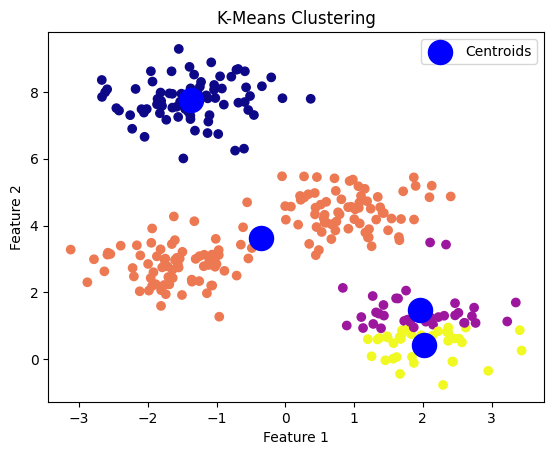

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data for demonstration
from sklearn.datasets import make_blobs

# Create sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# K-Means Clustering Implementation
class KMeansClustering:
    def __init__(self, k=3, max_iters=100):  # Corrected __init__ method
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def fit(self, data):
        # Randomly initialize centroids
        np.random.seed(0)
        initial_indices = np.random.choice(len(data), self.k, replace=False)
        self.centroids = data[initial_indices]

        for _ in range(self.max_iters):
            # Assign each point to the nearest centroid
            labels = [self._closest_centroid(point) for point in data]
            new_centroids = np.array([data[np.array(labels) == i].mean(axis=0) for i in range(self.k)])

            # Check for convergence (if centroids do not change)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

        self.labels = np.array(labels)

    def _closest_centroid(self, point):
        distances = np.linalg.norm(point - self.centroids, axis=1)
        return np.argmin(distances)

    def predict(self, data):
        return np.array([self._closest_centroid(point) for point in data])

# Run K-Means Clustering
kmeans = KMeansClustering(k=4)  # Ensure arguments can be passed
kmeans.fit(X)

# Plotting the clustered data
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='plasma', marker='o')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='blue', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Accuracy: 0.83


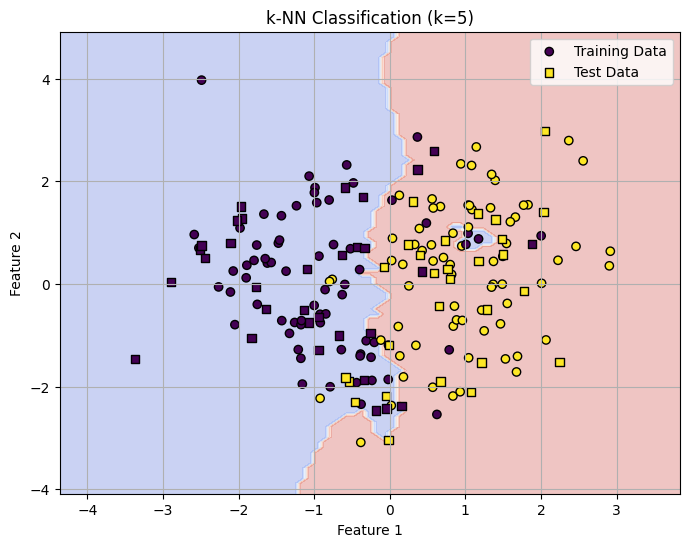

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data
X,y=make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# Train k-NN classifier
k=5
knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

# Predict and evaluate
y_pred= knn.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundaries
x_min,x_max= X[:,0].min()-1, X[:,0].max()+1
y_min,y_max= X[:,1].min()-1, X[:,1].max()+1
xx,yy= np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
Z= knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,alpha=0.3,cmap='coolwarm')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,marker='o',edgecolor='k',label="Training Data")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='s',edgecolor='k',label="Test Data")
plt.title(f"k-NN Classification (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error: 8588.30


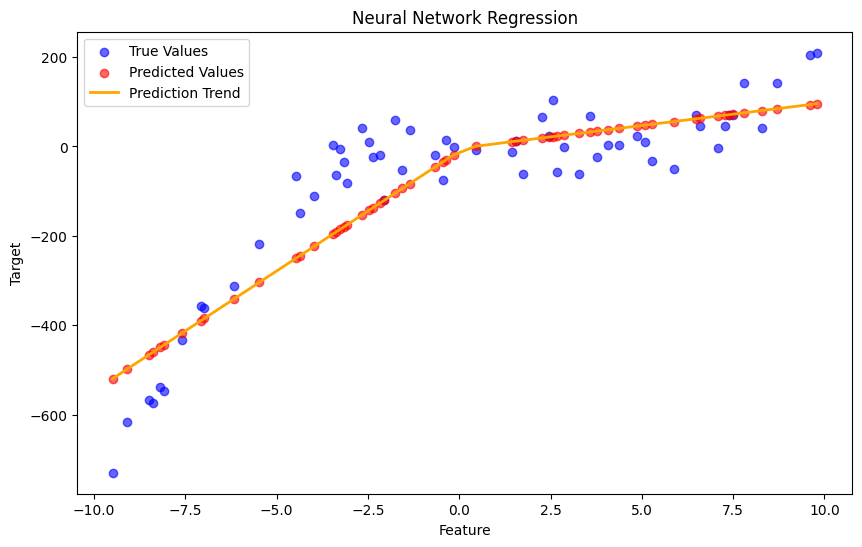

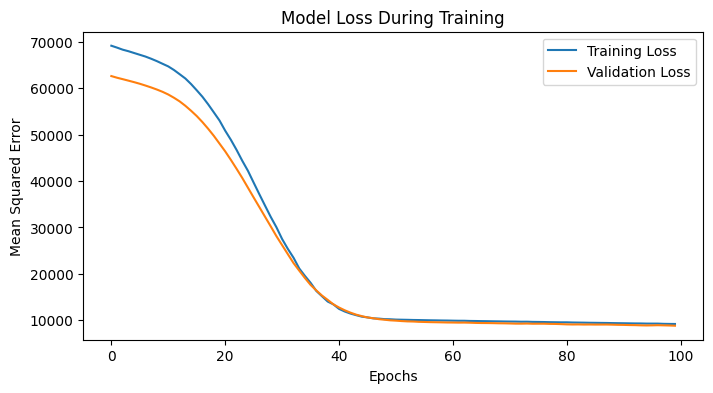

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-10, 10, 200)
y = 0.5 * X**3 - 3 * X**2 + 2 * X + np.random.normal(0, 50, X.shape[0])  # cubic relationship with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape X for Keras
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True Values', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.plot(np.sort(X_test, axis=0), np.sort(y_pred, axis=0), color='orange', linewidth=2, label='Prediction Trend')
plt.title("Neural Network Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

Accuracy: 0.85


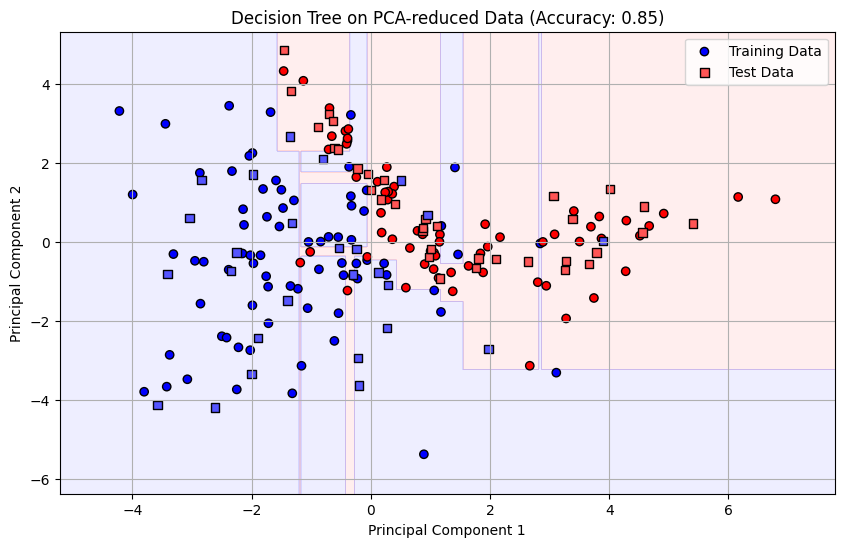

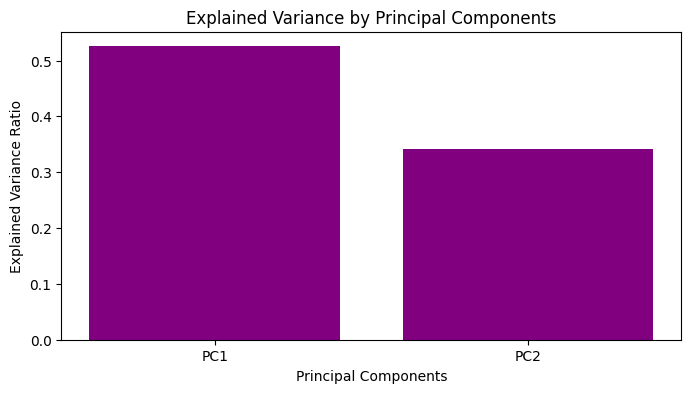

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=2, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Decision Tree Classifier on PCA-transformed data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']), label="Training Data")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='s', edgecolor='k', cmap=ListedColormap(['#FF5555', '#5555FF']), label="Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Decision Tree on PCA-reduced Data (Accuracy: {accuracy:.2f})")
plt.legend(loc="upper right")
plt.grid()
plt.show()

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, 3), pca.explained_variance_ratio_, tick_label=["PC1", "PC2"], color='purple')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.show()